#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data Import

In [75]:
df = pd.read_csv('train.csv')

In [76]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
data = np.array(df)

In [78]:
# Get the shape of the data and assign the values to variables m and n
m, n = data.shape

# Read the data from 'test.csv' using pandas and assign it to the variable data_dev
data_dev = pd.read_csv('test.csv')

# Convert data_dev to a numpy array
data_dev = np.array(data_dev)

# Transpose the data_dev array
data_dev = data_dev.T

# Assign the first row of data_dev to Y_dev
Y_dev = data_dev[0]

# Assign the entire data_dev array to X_dev
X_dev = data_dev

# Normalize the values in X_dev by dividing them by 255
X_dev = X_dev / 255.

# Transpose the data array
data = data.T

# Assign the first row of data to Y_train
Y_train = data[0]

# Assign columns 1 to n of data to X_train
X_train = data[1:n]

# Normalize the values in X_train by dividing them by 255
X_train = X_train / 255.


In [79]:
X_train.shape

(784, 42000)

In [80]:
print(Y_train.shape)
print(Y_train)

(42000,)
[1 0 1 ... 7 6 9]


In [81]:
print(Y_dev)
print(Y_dev.shape)

[0 0 0 ... 0 0 0]
(28000,)


In [82]:
X_dev.shape

(784, 28000)

In [83]:
print(X_train[:,0].shape)
print(X_dev[:,0].shape)

(784,)
(784,)


In [45]:
def init_params():
    # Initialize w1 as a 10x784 matrix with random values ranging from -0.5 to 0.5
    w1 = np.random.rand(10, 784) - 0.5
    # Initialize b1 as a 10x1 matrix with random values ranging from -0.5 to 0.5
    b1 = np.random.rand(10, 1) - 0.5
    # Initialize w2 as a 10x10 matrix with random values ranging from -0.5 to 0.5
    w2 = np.random.rand(10, 10) - 0.5
    # Initialize b2 as a 10x1 matrix with random values ranging from -0.5 to 0.5
    b2 = np.random.rand(10, 1) - 0.5

    # Return the initialized parameters
    return w1, b1, w2, b2


def ReLU(z):
    # Apply ReLU activation function to the input z
    return np.maximum(z, 0)


def softmax(z):
    # Compute the softmax activation for the input z
    return (np.exp(z) / sum(np.exp(z)))


def forward_prop(w1, b1, w2, b2, X):
    # Compute the weighted sum and activation of the first layer
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    # Compute the weighted sum and activation of the second layer
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)

    # Return the intermediate results and final activations
    return z1, a1, z2, a2


def ohe(y):
    # Convert class labels y into one-hot encoded format
    ohe_y = np.zeros((y.size, y.max() + 1))
    ohe_y[np.arange(y.size), y] = 1
    ohe_y = ohe_y.T

    # Return the one-hot encoded labels
    return ohe_y


def d_a(z):
    # Compute the derivative of the ReLU activation function
    return z > 0


def back_prop(z1, a1, z2, a2, w2, X, Y):
    # Compute the one-hot encoded labels
    ohe_y = ohe(Y)
    # Compute the derivative of the softmax activation
    dz2 = a2 - ohe_y
    # Compute the gradients for the second layer weights and biases
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    # Compute the gradients for the first layer weights and biases
    dz1 = w2.T.dot(dz2) * d_a(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)

    # Return the gradients
    return dw1, db1, dw2, db2


def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    # Update the parameters using gradient descent
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    # Return the updated parameters
    return w1, b1, w2, b2


In [46]:
def get_predictions(a2):
    # Get the predicted labels by finding the index of the maximum value in each column of a2
    return np.argmax(a2, 0)


def get_accuracy(pred, Y):
    # Compute and print the predicted labels and true labels for debugging purposes
    print(pred, Y)
    # Compute the accuracy by comparing the predicted labels (pred) with the true labels (Y)
    return np.sum(pred == Y) / Y.size


def gradient_descent(X, Y, iter, alpha):
    # Initialize the parameters
    w1, b1, w2, b2 = init_params()
    
    # Iterate for the specified number of iterations
    for i in range(iter):
        # Perform forward propagation
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        
        # Perform backpropagation to compute the gradients
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, X, Y)
        
        # Update the parameters using gradient descent
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        # Print the iteration number and compute and print the accuracy every 50 iterations
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), Y))

    # Return the updated parameters
    return w1, b1, w2, b2


In [51]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 1550, 0.05)

Iteration:  0
[2 7 2 ... 8 2 8] [1 0 1 ... 7 6 9]
Accuracy:  0.11957142857142856
Iteration:  50
[3 0 5 ... 7 2 7] [1 0 1 ... 7 6 9]
Accuracy:  0.2909047619047619
Iteration:  100
[3 0 6 ... 7 1 7] [1 0 1 ... 7 6 9]
Accuracy:  0.4714761904761905
Iteration:  150
[3 0 1 ... 7 6 4] [1 0 1 ... 7 6 9]
Accuracy:  0.5838571428571429
Iteration:  200
[3 0 1 ... 7 6 4] [1 0 1 ... 7 6 9]
Accuracy:  0.653547619047619
Iteration:  250
[2 0 1 ... 7 6 4] [1 0 1 ... 7 6 9]
Accuracy:  0.7067142857142857
Iteration:  300
[2 0 1 ... 7 6 4] [1 0 1 ... 7 6 9]
Accuracy:  0.7432380952380953
Iteration:  350
[3 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7678095238095238
Iteration:  400
[3 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7856666666666666
Iteration:  450
[3 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7994761904761905
Iteration:  500
[3 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8101904761904762
Iteration:  550
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8191666666666667
Iteration:  600
[1 

In [52]:
def make_predictions(X, W1, b1, W2, b2):
    # Perform forward propagation to get the final activations (a2)
    _, _, _, a2 = forward_prop(W1, b1, W2, b2, X)
    # Get the predictions by finding the index of the maximum value in each column of a2
    predictions = get_predictions(a2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    # Get the current image from the training set
    current_image = X_train[:, index, None]
    # Make predictions for the current image
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    # Get the true label for the current image
    label = Y_train[index]
    
    # Print the prediction and the true label
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    # Reshape the current image and display it
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [1]
Label:  1


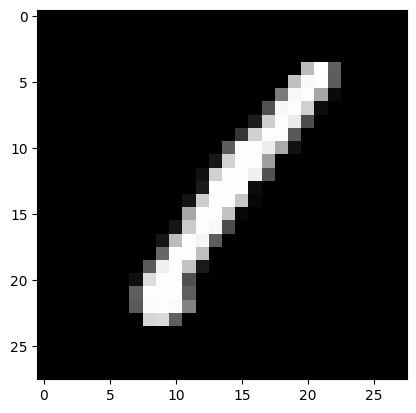

Prediction:  [0]
Label:  0


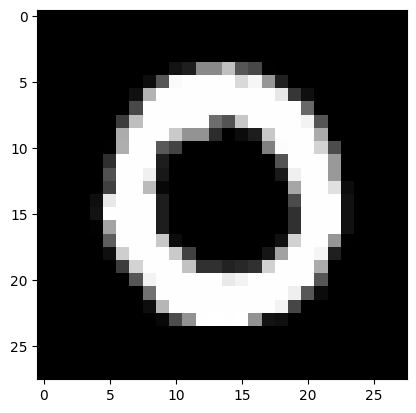

Prediction:  [1]
Label:  1


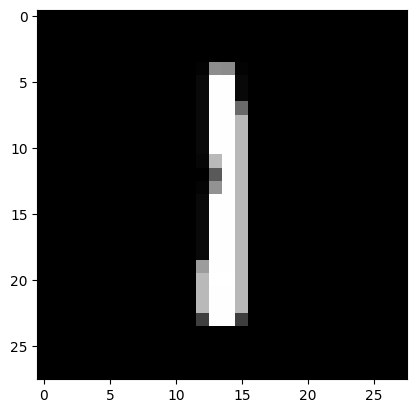

Prediction:  [8]
Label:  8


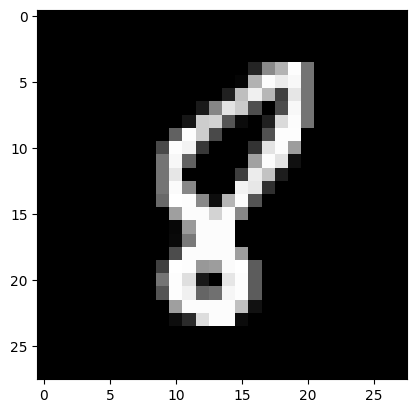

In [55]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(106, w1, b1, w2, b2)

In [84]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 0 9 ... 3 9 2] [0 0 0 ... 0 0 0]


0.09928571428571428

In [ ]:
# Obtain predictions for X_dev using the given weights
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)

# Calculate the accuracy of the predictions by comparing them with the true labels Y_dev
accuracy = get_accuracy(dev_predictions, Y_dev)

# Print the accuracy
print("Accuracy on dev set: ", accuracy)
